In [45]:
#Imports importantes
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [92]:
#Funçoes para converter para float e para int
def ConverterFloat(data):
    datac = pd.to_numeric(data, errors='coerce')
    return datac

def ConverterInt(data):
    datac = pd.to_numeric(data, errors='coerce',downcast='integer')
    return datac


In [93]:
#Carrega o Csv Monstrao
dados = pd.read_csv('precos_casa_california.csv')

#Converter e arrumar dados
dados_new = dados
dados_new["longitude"] = ConverterFloat(dados_new["longitude"])
dados_new["latitude"] = ConverterFloat(dados_new["latitude"])
dados_new["housing_median_age"] = ConverterInt(dados_new["housing_median_age"])
dados_new["total_rooms"] = ConverterInt(dados_new["total_rooms"])
dados_new["total_bedrooms"] = ConverterInt(dados_new["total_bedrooms"])
dados_new["population"] = ConverterInt(dados_new["population"])
dados_new["households"] = ConverterInt(dados_new["households"])
dados_new["median_income"] = ConverterFloat(dados_new["median_income"])
dados_new["median_house_value"] = ConverterFloat(dados_new["median_house_value"])
dados_new['ocean_proximity'] = dados_new['ocean_proximity'].replace({'<1H OCEAN': 0, 'INLAND': 1,'NEAR OCEAN':2,'NEAR BAY':3, 'ISLAND':4})
dados_new["ocean_proximity"] = ConverterFloat(dados_new["ocean_proximity"])
dados_new = dados_new.dropna()

#Casas que possuam valor maior que 500k serão desconsideradas
dados_new = dados_new[dados_new['median_house_value']<=500000].reset_index(drop=True)

#Casas que possuam uma idade maior que 55 serão desconsideradas
dados_new = dados_new[dados_new['housing_median_age']<=55].reset_index(drop=True)

#Familias com uma renda maior que 11 serão desconsideradas
dados_new=dados_new[dados_new['median_income']<=11].reset_index(drop=True)

#População maior que 8000 serão desconsideradas
dados_new=dados_new[dados_new['population']<=8000]

#Membros de familia  maior que 900 serão desconsideradas
dados_new=dados_new[dados_new['households']<=3000]


median_house_value    1.000000
median_income         0.642875
total_rooms           0.155467
households            0.100648
total_bedrooms        0.079016
housing_median_age    0.071317
population            0.008662
ocean_proximity       0.003698
longitude            -0.042405
latitude             -0.152982
Name: median_house_value, dtype: float64


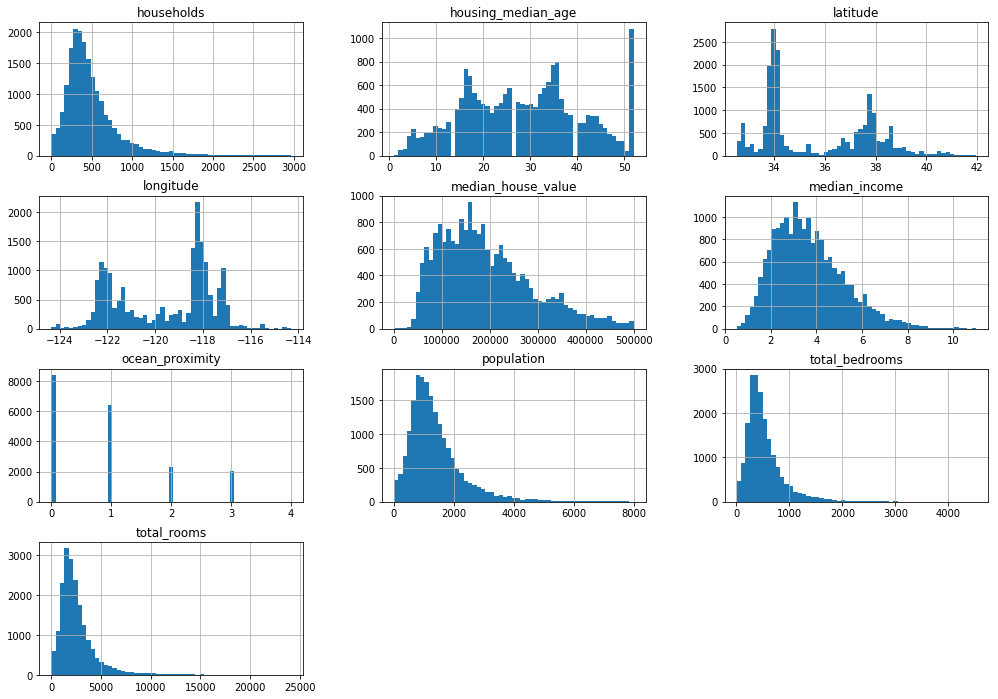

In [94]:
corr_matrix = dados_new.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

#Graficos
dados_new.hist(bins=55,figsize=(17,12))
plt.show()

In [96]:
#Separar em treino e teste
y = dados_new['median_house_value']
x = dados_new.drop(columns=['median_house_value'])
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3,random_state = 7)

#Treinamento *Eye of the Tiger playing*
model = GradientBoostingRegressor()
model.fit(x_treino,y_treino)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [97]:
#Testes
score = model.score(x_teste,y_teste)
print("Score final meu compadecido:",score)

Score final meu compadecido: 0.7342822613421238
